# Stock Bot
the stuff

In [1]:
from tensorflow import keras
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import gym_anytrading
from StockTradeEnv import FastTrainingStockTradeEnv
from LowRegulationStockTradeEnv import LowRegulationStockTradeEnv
import quantstats as qs
from stable_baselines3.common.callbacks import CheckpointCallback, EveryNTimesteps
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, Activation, Concatenate
from tensorflow.keras.optimizers import Adam
from stable_baselines3 import PPO, A2C
from stable_baselines3.ppo.policies import MlpPolicy as MlpPolicyPPO
from stable_baselines3.a2c.policies import MlpPolicy as MlpPolicyA2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv,SubprocVecEnv,VecEnv
from Utilities import *
from LSTMPolicy import CustomLSTM
import torch
from torch import nn

## Training / setup
you'll see and you'll know

In [2]:
# Parallel environments
stks = ['kros','nflx','tmus','adct','h','bngo','amzn','nio','fb','gme','work']#,'irbt','upwk','fvrr','rdfn','bynd','etsy','pins','zg','roku','sq','pm','dis','nlok','bio','gbio']
env = DummyVecEnv([lambda: LowRegulationStockTradeEnv(ticker=stks[i],df=None,frame_bound=(100, 100000), window_size=1,initial_balance=25000,verbose=2) for i in range(len(stks))])
# df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/nflx.us.txt")
# env = LowRegulationStockTradeEnv(df=df,frame_bound=(100, 100000), window_size=1,initial_balance=25000,verbose=2)

/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precisi

In [3]:
policy_kwargs = dict(
    features_extractor_class=CustomLSTM,
    features_extractor_kwargs=dict(),
)
model_a2c = A2C(MlpPolicyA2C, env, verbose=0,policy_kwargs=policy_kwargs)

In [4]:
model_a2c=model_a2c.learn(100000)

: Held, networth: 25010.08999824524, shares: 1
       step reward: 1.8979988098144531
Step: 128 ----------------------
        Tried to Sell. Unable.
       step reward: 0.0
Step: 128 ----------------------
       step reward: 0.0
Step: 128 ----------------------
        work: Sold 1 stock(s) for:31.329999923706055,networth: 25030.680000305176, shares: 0
       step reward: -0.4289999008178711
Step: 128 ----------------------
        Tried to Sell. Unable.
       step reward: 0.0
Step: 128 ----------------------
        work: Bought 1 stock(s) for:31.329999923706055, networth: 25020.86000442505, shares: 1
       step reward: 0.0
Step: 128 ----------------------
        work: Held, networth: 25006.50000190735, shares: 1
       step reward: -0.4289999008178711
Step: 128 ----------------------
        Tried to Sell. Unable.
       step reward: -1.7159996032714844
Step: 128 ----------------------
       step reward: 0.0
Step: 128 ----------------------
        work: Held, networth: 24993.2

# Testing
Lets see how the model did!

/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
iters: 4656


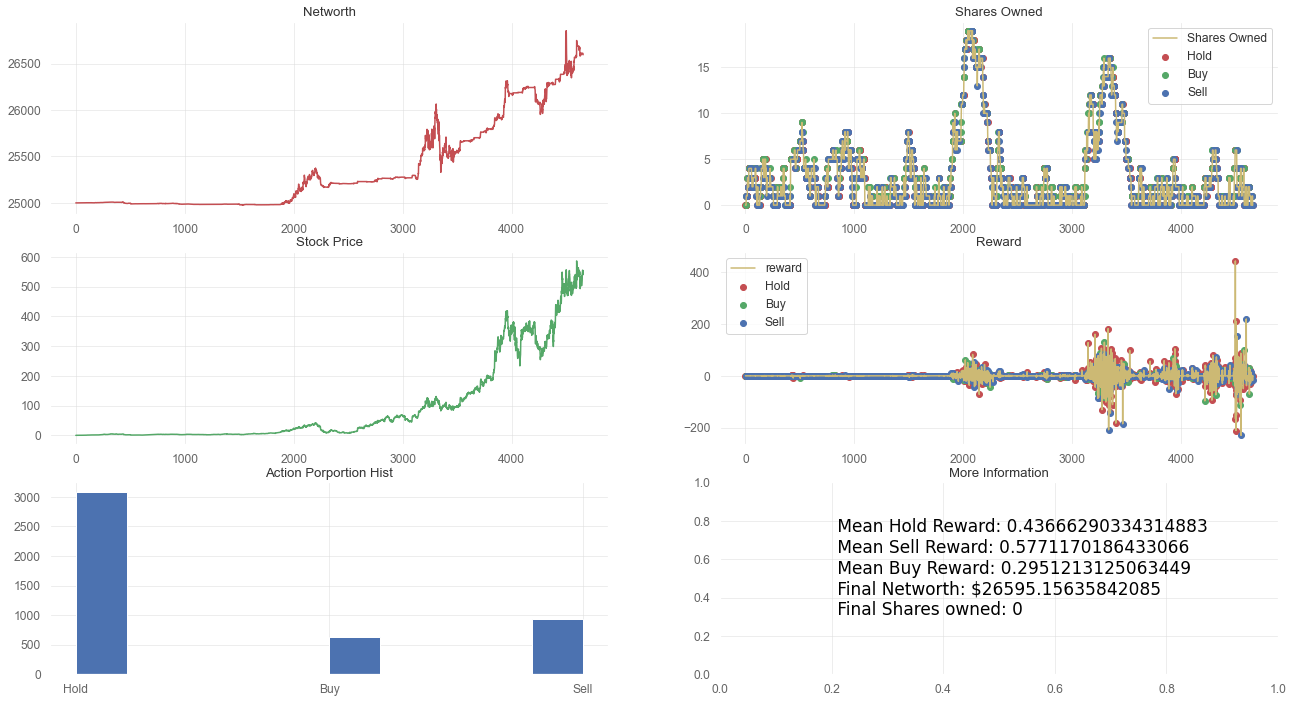

In [9]:
# #test on val set A2C
# sample_df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/agio.us.txt")
env_a = eval_model_low_reg(stk_ticker="nflx",df=None,model=model_a2c,verbose=0)
fig_a = plot_history(env_a.history,(22, 12)) 

/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
iters: 156


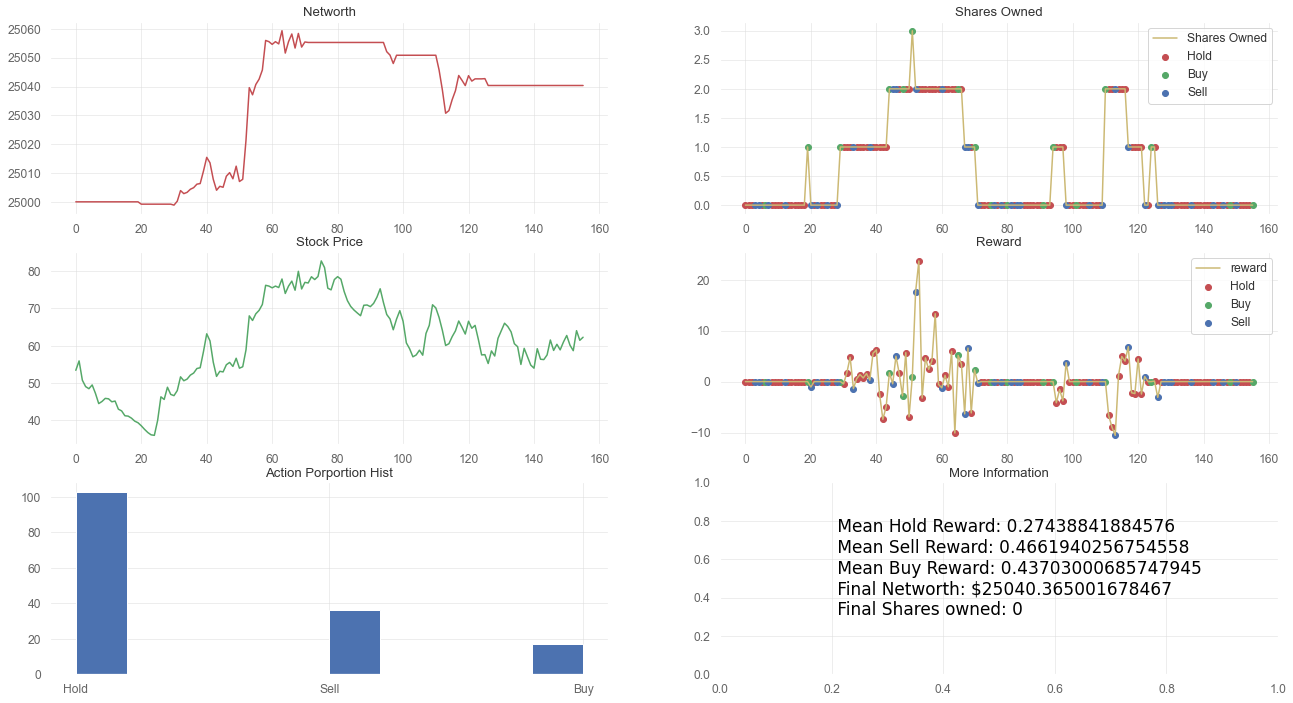

In [8]:
#test on train set A2C
# sample_df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/nflx.us.txt")
env_a = eval_model_low_reg(stk_ticker="kros",df=None,model=model_a2c,verbose=0)
fig_a = plot_history(env_a.history,(22, 12)) 